# XGBoost with Shap

In [71]:
#!pip install shap

In [1]:
import matplotlib.pylab as pl
import xgboost
from sklearn.model_selection import train_test_split

import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
X, y = shap.datasets.nhanesi()
X_display, y_display = shap.datasets.nhanesi(
    display=True
)  # 

In [3]:
y

array([-16.91666667, -17.16666667, -17.66666667, ..., -17.08333333,
       -17.08333333, -17.08333333])

In [4]:
import pandas as pd
df = pd.read_csv('miRNAexpression_dayssurvival.csv')
df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Survival
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,0.0,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,3.353388
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,0.0,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,12.788901
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,0.0,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,42.344741
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,0.0,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,8.153335
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,0.0,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,23.835355


In [5]:
Y=df['Survival']
print(Y)
y=pd.DataFrame(Y)
l=y.to_numpy()

m=l.ravel()

m

0       3.353388
1      12.788901
2      42.344741
3       8.153335
4      23.835355
         ...    
478    17.062827
479    23.605221
480     1.808199
481    17.029950
482    14.564224
Name: Survival, Length: 483, dtype: float64


array([3.35338791e+00, 1.27889009e+01, 4.23447414e+01, 8.15333531e+00,
       2.38353552e+01, 2.04819673e+01, 6.55883223e+01, 5.30624322e+01,
       1.13094651e+01, 2.11723707e+01, 1.48272348e+01, 3.55064602e+00,
       1.26245192e+01, 2.16983923e+00, 4.18515961e+01, 1.52217510e+01,
       2.81092810e+01, 2.04490910e+01, 6.47664135e+00, 2.79120229e+01,
       1.15395996e+01, 6.83828122e+00, 3.15612980e+00, 1.44655949e+01,
       7.82457179e+00, 2.26846829e+00, 8.74510964e+00, 7.89032449e+00,
       2.04819673e+01, 1.64052997e+01, 6.14787783e+00, 2.79448992e+00,
       2.24216721e+01, 3.67228852e+01, 3.36982608e+01, 5.02021896e+01,
       4.49748496e+01, 6.62787257e+01, 1.40710787e+01, 3.83995792e+01,
       7.10457968e+01, 1.44655949e+01, 2.57093073e+01, 7.56156097e+00,
       1.43998422e+01, 6.96978663e+00, 6.27938324e+00, 1.26902719e+01,
       5.21418943e+01, 1.43340895e+01, 4.28050104e+01, 1.30519118e+01,
       4.76707105e+00, 4.04379130e+00, 1.77532301e+01, 3.06736365e+01,
      

In [6]:
df=df.drop('Survival', axis=1)
df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,1.6747,0.0,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,4.0275,0.0,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,3.0046,0.0,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,3.0337,0.0,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,2.4901,0.0,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741


In [7]:
xgb_full = xgboost.DMatrix(df, label=m)
xgb_full

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, m, test_size=0.15, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)
y_train.shape

(410,)

In [9]:
# use validation set to choose # of trees
params = {"eta": 0.002, "max_depth": 3, "objective": "survival:cox", "subsample": 0.5}
model_train = xgboost.train(
    params, xgb_train, 5000, evals=[(xgb_test, "test")], verbose_eval=1000
)

[0]	test-cox-nloglik:3.33229
[1000]	test-cox-nloglik:3.29762
[2000]	test-cox-nloglik:3.32535
[3000]	test-cox-nloglik:3.36571
[4000]	test-cox-nloglik:3.40249
[4999]	test-cox-nloglik:3.44119


In [10]:
#train final model on the full data set
params = {"eta": 0.002, "max_depth": 3, "objective": "survival:cox", "subsample": 0.5}
model = xgboost.train(
    params, xgb_full, 10000, evals=[(xgb_full, "test")], verbose_eval=1000
)

[0]	test-cox-nloglik:5.18603
[1000]	test-cox-nloglik:4.90164
[2000]	test-cox-nloglik:4.71441
[3000]	test-cox-nloglik:4.56850
[4000]	test-cox-nloglik:4.44971
[5000]	test-cox-nloglik:4.35008
[6000]	test-cox-nloglik:4.26507
[7000]	test-cox-nloglik:4.18975
[8000]	test-cox-nloglik:4.12286
[9000]	test-cox-nloglik:4.06481
[9999]	test-cox-nloglik:4.01136


In [12]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches / total


# see how well we can order people by survival
c_statistic_harrell(model.predict(xgb_test), y_test)

0.9714611872146118

In [13]:
shap_values = shap.TreeExplainer(model).shap_values(df)

[12:58:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


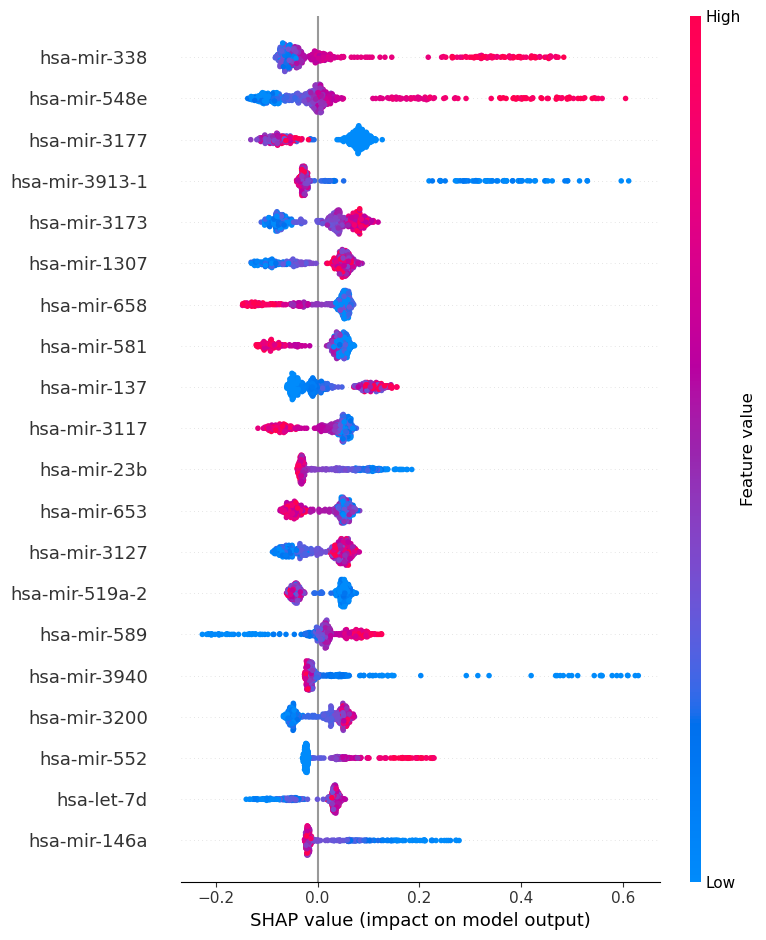

In [14]:
shap.summary_plot(shap_values, df)


In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(
    X.iloc[:2000, :]
)

[12:59:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
shap.summary_plot(shap_interaction_values, X.iloc[:200, :])

In [143]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(
    df.iloc[:2000, :]
)

[00:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


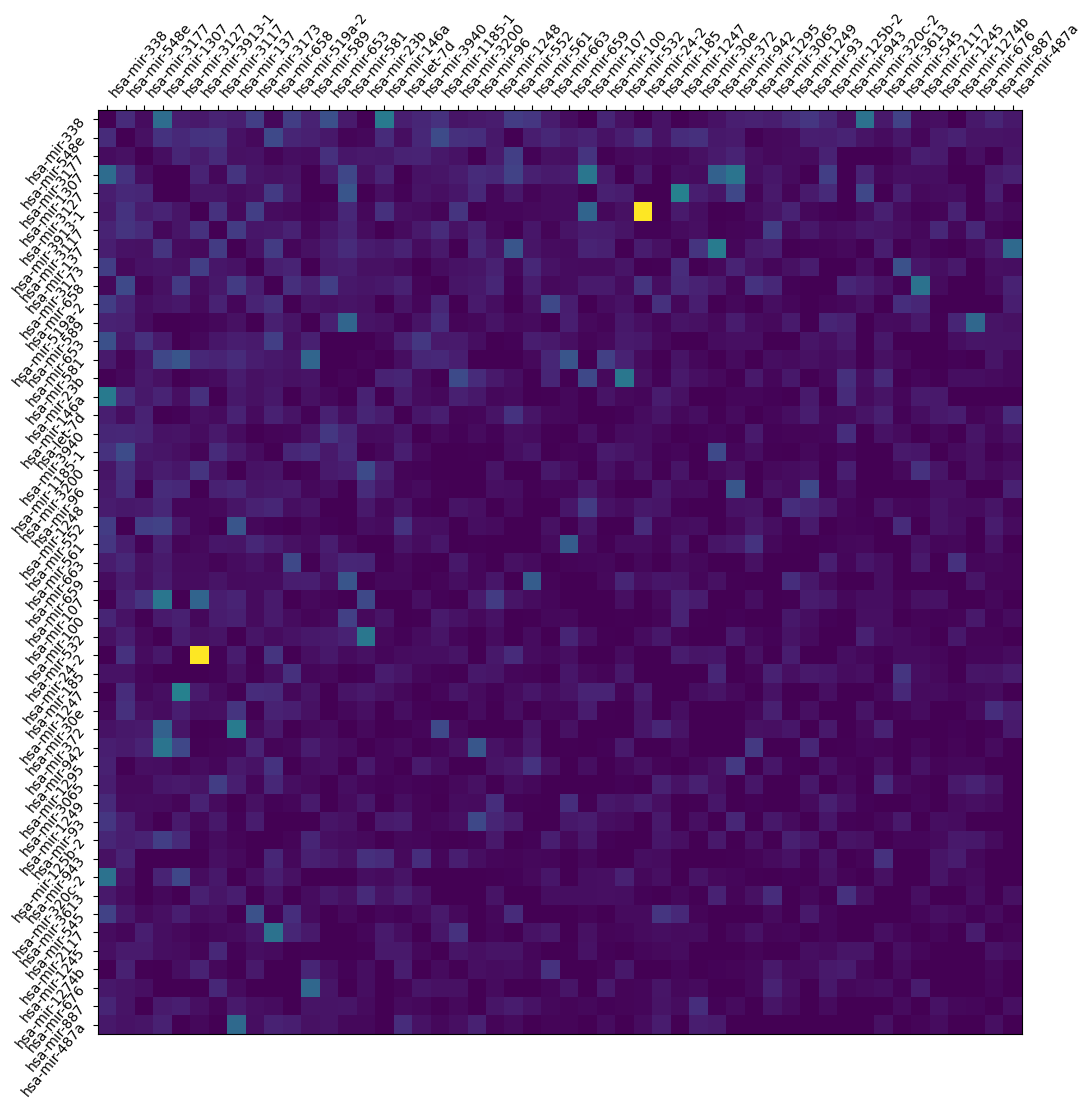

In [144]:
import matplotlib.pylab as pl
import numpy as np
tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i, i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds, :][:, inds]
pl.figure(figsize=(12, 12))
pl.imshow(tmp2)
pl.yticks(
    range(tmp2.shape[0]), df.columns[inds], rotation=50.4, horizontalalignment="right"
)
pl.xticks(
    range(tmp2.shape[0]), df.columns[inds], rotation=50.4, horizontalalignment="left"
)
pl.gca().xaxis.tick_top()
pl.show()